In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

/home/aryan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2025-02-03 02:19:13.922797: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 02:19:15.076894: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 02:19:15.596875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738529356.043195   67670 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
y_train, y_test = y_train.flatten(), y_test.flatten()

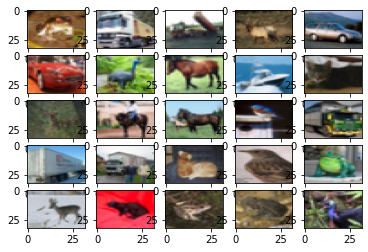

In [9]:
fig, ax = plt.subplots(5,5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

In [10]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [11]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

2025-02-03 02:19:40.256705: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

In [13]:
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [14]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50


2025-02-03 02:19:44.280962: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 616s 387ms/step - accuracy: 0.4508 - loss: 1.7936 - val_accuracy: 0.6492 - val_loss: 1.0159
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 519s 332ms/step - accuracy: 0.6925 - loss: 0.8812 - val_accuracy: 0.7229 - val_loss: 0.8129
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 540s 346ms/step - accuracy: 0.7595 - loss: 0.6971 - val_accuracy: 0.7405 - val_loss: 0.7690
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 557s 356ms/step - accuracy: 0.8039 - loss: 0.5711 - val_accuracy: 0.7913 - val_loss: 0.6185
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 535s 342ms/step - accuracy: 0.8314 - loss: 0.4850 - val_accuracy: 0.7709 - val_loss: 0.7171
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 566s 345ms/step - accuracy: 0.8618 - loss: 0.3962 - val_accuracy: 0.7929 - val_loss: 0.6492
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 530s 339ms/step - accuracy: 0.8858 - loss: 0.3306 - val_accuracy: 0.8184 - val_loss: 0.5797
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 558s 337ms/step - accuracy: 0.9

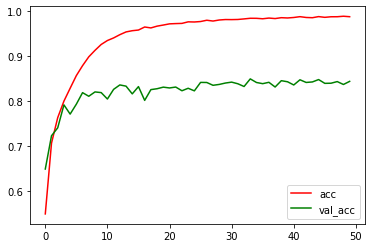

In [44]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')

plt.legend()

plt.show()

In [43]:
final_acc = r.history['accuracy'][-1]
final_val_acc = r.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_acc:.2f}")
print(f"Final Validation Accuracy: {final_val_acc:.2f}")

Final Training Accuracy: 0.99
Final Validation Accuracy: 0.84


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


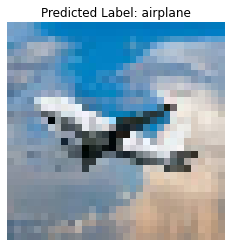

Predicted label: airplane


In [36]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image_path = "airplane.jpeg"

img = load_img(image_path, target_size=(32, 32))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = labels[np.argmax(prediction)]

plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


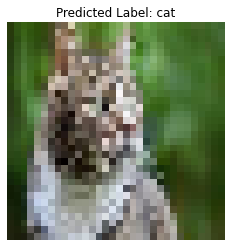

Predicted label: cat


In [37]:
image_path = "cat.jpeg"

img = load_img(image_path, target_size=(32, 32))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = labels[np.argmax(prediction)]

plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


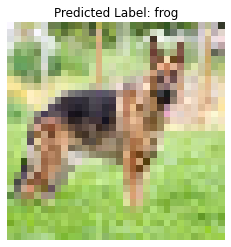

Predicted label: frog


In [38]:
image_path = "dog.jpeg"

img = load_img(image_path, target_size=(32, 32))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = labels[np.argmax(prediction)]

plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


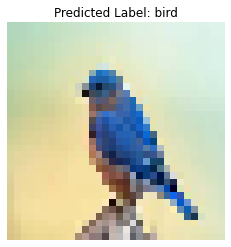

Predicted label: bird


In [39]:
image_path = "bird.jpeg"

img = load_img(image_path, target_size=(32, 32))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = labels[np.argmax(prediction)]

plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


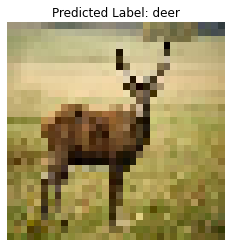

Predicted label: deer


In [40]:
image_path = "deer.jpeg"

img = load_img(image_path, target_size=(32, 32))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = labels[np.argmax(prediction)]

plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


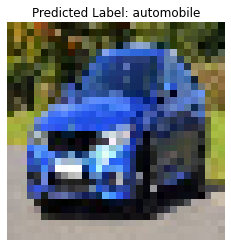

Predicted label: automobile


In [45]:
image_path = "car.jpeg"

img = load_img(image_path, target_size=(32, 32))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = labels[np.argmax(prediction)]

plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

print(f"Predicted label: {predicted_label}")

In [46]:
model.save('Image_Classification.h5')